Running on local simulator
Counts(noise): {'01101': 1, '10110': 1, '10100': 1, '10011': 3, '01100': 3, '00111': 1, '00011': 2, '11110': 7, '00000': 410, '00010': 43, '11111': 386, '00100': 11, '10000': 5, '11011': 21, '11101': 43, '01111': 8, '10101': 3, '10111': 17, '11100': 3, '00001': 10, '00110': 3, '01000': 15, '01110': 3}


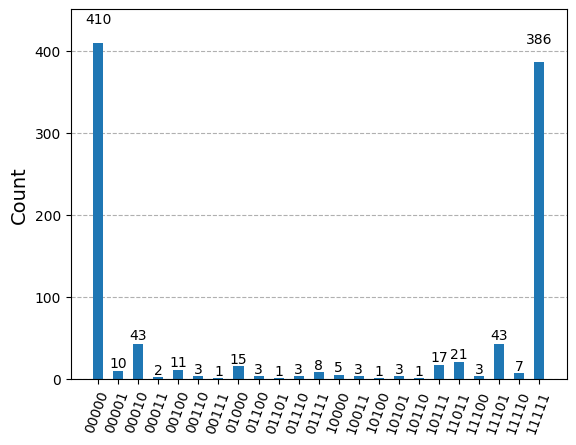

In [7]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram
from iqm.qiskit_iqm import IQMProvider
import os
import numpy as np

num_shots = 1000
n = int(input("No. of qbits? "))
spark = bool(int(input("Run on spark? ")))

if n < 1:
    print("Invalid input")
    exit()

if spark:
    os.environ["IQM_TOKENS_FILE"] = r"/home/xederro/.cache/iqm-client-cli/tokens.json"
    IQM_URL = "https://odra5.e-science.pl/station"
    provider = IQMProvider(IQM_URL)
    backend = provider.get_backend()
    print("Running on Spark")
else:
    sim = FakeManilaV2()
    backend = AerSimulator.from_backend(sim)
    print("Running on local simulator")

circuit = QuantumCircuit(n)

circuit.h(0)
for i in range(n-1):
    circuit.cx(0, i+1)
circuit.measure_all()

circuit.draw(output='mpl')

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl', style="iqp")

result = backend.run(transpiled_circuit, shots=num_shots).result()
counts = result.get_counts(0)
print('Counts(noise):', counts)
plot_histogram(counts)